# Passos para criar modelo sobre previsao de novos assinante do novo seguro de saúde.

## Topicos.

**1.** Descrissao dos Dados

**2.** Features Engineering

**3.** Filtragem das Variaveis

**4.** Analise Exploratória dos Dados

**5.** Modelo de Machine Learning

**6.** Modelo em Produção

# 0 Imports

In [62]:
import pandas  as pd
import numpy   as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from matplotlib              import pyplot as plt

# 1 Passo 1 descrisão dos dados

## 1.1 load datasete

In [6]:
# load data
df_raw = pd.read_csv('../data/insurance_data-1.csv')
df_raw


,id,gender,age,region_code,policy_sales_channel,previously_insured,annual_premium,vintage,response,driving_license,vehicle_age,vehicle_damage
0,7,Male,23,11.0,152.0,0,23367.0,249,0,1,< 1 Year,Yes
1,13,Female,41,15.0,14.0,1,31409.0,221,0,1,1-2 Year,No
2,18,Female,25,35.0,152.0,1,46622.0,299,0,1,< 1 Year,No
3,31,Female,26,8.0,160.0,0,2630.0,136,0,1,< 1 Year,No
4,39,Male,45,8.0,124.0,0,42297.0,264,0,1,1-2 Year,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381070,Male,24,8.0,152.0,1,38254.0,127,0,1,< 1 Year,No
381105,381079,Female,58,28.0,26.0,0,39740.0,170,0,1,1-2 Year,Yes
381106,381082,Female,75,28.0,26.0,1,51619.0,80,0,1,1-2 Year,No
381107,381097,Female,49,10.0,26.0,0,34541.0,44,0,1,1-2 Year,Yes


In [9]:
df1 = df_raw.copy()

## 1.2 Data Dimencion

In [16]:
# data dimencion
print('quantidade de linhas: {}'.format(df1.shape[0]))
print('quantidade de colunas: {}'.format(df1.shape[1]))

quantidade de linhas: 381109
quantidade de colunas: 12


## 1.3 Verificassao de dados faltantes

In [21]:
# verificando NaN
df1.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
previously_insured      0
annual_premium          0
vintage                 0
response                0
driving_license         0
vehicle_age             0
vehicle_damage          0
dtype: int64

## 1.4 descrissao estatistica

In [44]:
# separando dados numericos e dados categoricos
num_actributes = df1.select_dtypes( include = ['int64', 'float64'])
cat_actributes = df1.select_dtypes( exclude = ['int64', 'float64'])

In [51]:
# verificando estatistica descritiva
num_actributes.describe()

,id,age,region_code,policy_sales_channel,previously_insured,annual_premium,vintage,response,driving_license
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,26.388807,112.034295,0.458210,30564.389581,154.347397,0.122563,0.997869
std,110016.836208,15.511611,13.229888,54.203995,0.498251,17213.155057,83.671304,0.327936,0.046110
min,1.000000,20.000000,0.000000,1.000000,0.000000,2630.000000,10.000000,0.000000,0.000000
25%,95278.000000,25.000000,15.000000,29.000000,0.000000,24405.000000,82.000000,0.000000,1.000000
50%,190555.000000,36.000000,28.000000,133.000000,0.000000,31669.000000,154.000000,0.000000,1.000000
75%,285832.000000,49.000000,35.000000,152.000000,1.000000,39400.000000,227.000000,0.000000,1.000000
max,381109.000000,85.000000,52.000000,163.000000,1.000000,540165.000000,299.000000,1.000000,1.000000


<Axes: xlabel='previously_insured', ylabel='id'>

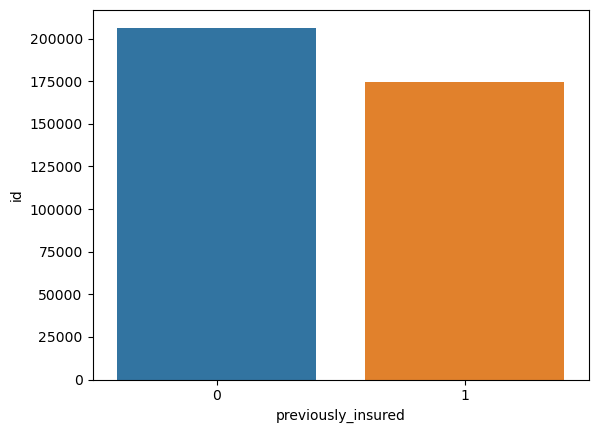

In [65]:
# verificando a quantidade de cliente com a assinatura
df_aux = df1.loc[:, ['id', 'previously_insured']].groupby('previously_insured').count().reset_index()

sns.barplot(x='previously_insured', y='id', data=df_aux)



## 1.5 categorial attributes

In [58]:
cat_actributes.apply(lambda x: x.unique().shape[0])

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

# 2. passo 2.0 Feature Engneering

## 2.1 Mapa mental de Hipotese

In [67]:
df1

,id,gender,age,region_code,policy_sales_channel,previously_insured,annual_premium,vintage,response,driving_license,vehicle_age,vehicle_damage
0,7,Male,23,11.0,152.0,0,23367.0,249,0,1,< 1 Year,Yes
1,13,Female,41,15.0,14.0,1,31409.0,221,0,1,1-2 Year,No
2,18,Female,25,35.0,152.0,1,46622.0,299,0,1,< 1 Year,No
3,31,Female,26,8.0,160.0,0,2630.0,136,0,1,< 1 Year,No
4,39,Male,45,8.0,124.0,0,42297.0,264,0,1,1-2 Year,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381070,Male,24,8.0,152.0,1,38254.0,127,0,1,< 1 Year,No
381105,381079,Female,58,28.0,26.0,0,39740.0,170,0,1,1-2 Year,Yes
381106,381082,Female,75,28.0,26.0,1,51619.0,80,0,1,1-2 Year,No
381107,381097,Female,49,10.0,26.0,0,34541.0,44,0,1,1-2 Year,Yes


### 2.1.1 Hipoteses previously_insured

**1.** quanto mais tempo sendo cliente e mais proval de ter o seguro.

**2.** quato mais velho a pessoa mais provavel de ter o seguro.

**3.** pessoa com carteira de motorista e mais provavel de ter seguro.

**4.** pessoas com veiculos a mais tepo mais provavel de ter seguro.


### 2.1.2 Hiposese Age

**1** pessoas mais velhas mais tempo sendo cliente.

**2** pessoas mais velhas maior premio anual.

**3** pessoas mais velhas mais provavel de ter carteira de motorista.

**4** pessoas mais velhas mais provael de ter veiculo.
